# feed forward network - MNIST dataset

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
#hyper parameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples=iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 56811700.27it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1923704.84it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5955844.93it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1784425.70it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


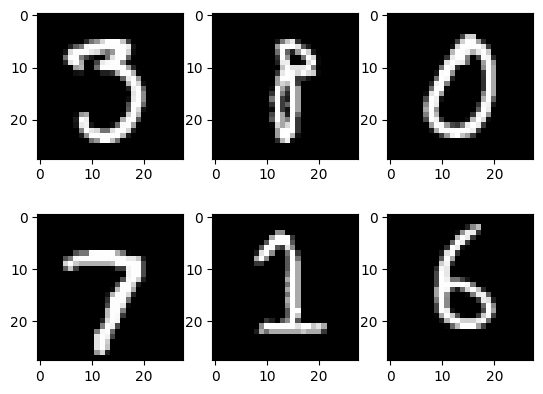

In [3]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
#plt.show()



In [4]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i,(images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    #value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')

epoch 1/5, step 100/600, loss = 0.4594
epoch 1/5, step 200/600, loss = 0.4073
epoch 1/5, step 300/600, loss = 0.2639
epoch 1/5, step 400/600, loss = 0.4161
epoch 1/5, step 500/600, loss = 0.1965
epoch 1/5, step 600/600, loss = 0.2303
epoch 2/5, step 100/600, loss = 0.2569
epoch 2/5, step 200/600, loss = 0.2627
epoch 2/5, step 300/600, loss = 0.1549
epoch 2/5, step 400/600, loss = 0.2125
epoch 2/5, step 500/600, loss = 0.3512
epoch 2/5, step 600/600, loss = 0.1664
epoch 3/5, step 100/600, loss = 0.1397
epoch 3/5, step 200/600, loss = 0.1377
epoch 3/5, step 300/600, loss = 0.1652
epoch 3/5, step 400/600, loss = 0.2001
epoch 3/5, step 500/600, loss = 0.0669
epoch 3/5, step 600/600, loss = 0.1297
epoch 4/5, step 100/600, loss = 0.0447
epoch 4/5, step 200/600, loss = 0.1085
epoch 4/5, step 300/600, loss = 0.2109
epoch 4/5, step 400/600, loss = 0.0698
epoch 4/5, step 500/600, loss = 0.1039
epoch 4/5, step 600/600, loss = 0.1375
epoch 5/5, step 100/600, loss = 0.1487
epoch 5/5, step 200/600, 